# Exploring the Relationship between COVID-19 Hospital Cases and Socio-Demographic Factors in the UK: A Data Analysis Study

# Introduction


The introduction of the report aims to provide an overview of a dataset containing information about COVID-19 hospitalizations in various areas of the UK. The dataset includes variables such as areaCode, areaName, areaType, date, and hospitalCases. The areaCode variable is a unique identifier assigned to each area in the UK, while the areaName variable refers to the name of the area. The areaType variable indicates the type of the area, such as region, upper-tier local authority, lower-tier local authority, or other types. The date variable represents the date when the data was recorded and is updated daily. The hospitalCases variable denotes the number of people currently hospitalized with COVID-19 in the specified area on the given date. The purpose of this report is to analyze the dataset and explore patterns and relationships among the variables to gain insights into the current situation of COVID-19 hospitalizations in the UK.

# Aims



To analyze the trends in COVID-19 hospitalizations across different areas in the UK.
To identify any significant changes or patterns in hospitalization rates over time.
To develop a predictive model that can forecast future hospitalization rates based on historical data.
To provide insights and recommendations to healthcare professionals and policymakers based on the analysis and modeling results.

# Research Question
# How do different factors such as location, time of year, and trend of cases affect the number of hospital cases in the UK during the COVID-19 pandemic, and can we create an accurate regression model to predict future hospitalization rates?


# Import data packages

In [1]:

import pandas as pd
import numpy as np
#Import plot package
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#Import time series
from datetime import datetime
import sys
#Import ignore warning package
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
#Import random forest regressor model
from sklearn.ensemble import RandomForestRegressor
#Import Lasso regression model
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score,mean_squared_log_error


# Data Importation
The data sets used in this analysis were obtained from a reliable source - the UK government's COVID-19 data portal. The data was retrieved for four nations within the UK: England, Wales, Northern Ireland, and Scotland. The data sets were imported into the analysis using the pandas library in Python. The data was in CSV format, and pandas was used to read the files and create data frames that could be easily manipulated and analyzed.

In [2]:
#loading the data sets

england = pd.read_csv("england.csv")
north_ireland = pd.read_csv("north_ireland.csv")
scotland = pd.read_csv("scotland.csv")
wales = pd.read_csv("wales.csv")




#  Data Understanding


In [3]:
# Concatenate the dataframes so as to have one main data frame
df = pd.concat([england, north_ireland, scotland, wales])
# Write the concatenated dataframe to a CSV file


Concatenating the four datasets, which correspond to different nations in the UK, is suitable because it allows to analyze and compare the hospitalization trends of COVID-19 across the UK as a whole. By combining the datasets, we can create a more comprehensive view of the situation and identify any patterns or differences that may exist between the four nations. This approach can provide a more holistic understanding of the COVID-19 situation in the UK and can inform policymakers and health officials in making more informed decisions.

In [4]:
#first five records of the data
df

,areaCode,areaName,areaType,date,hospitalCases
0,E92000001,England,nation,3/29/2023,7963
1,E92000001,England,nation,3/28/2023,8080
2,E92000001,England,nation,3/27/2023,8316
3,E92000001,England,nation,3/26/2023,8265
4,E92000001,England,nation,3/25/2023,8234
...,...,...,...,...,...
1089,W92000004,Wales,nation,2020-04-05,664
1090,W92000004,Wales,nation,2020-04-04,596
1091,W92000004,Wales,nation,2020-04-03,568
1092,W92000004,Wales,nation,2020-04-02,525


In [5]:
#columns of the data set
df.columns

Index(['areaCode', 'areaName', 'areaType', 'date', 'hospitalCases'], dtype='object')

In [6]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4413 entries, 0 to 1093
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   areaCode       4413 non-null   object
 1   areaName       4413 non-null   object
 2   areaType       4413 non-null   object
 3   date           4413 non-null   object
 4   hospitalCases  4413 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 206.9+ KB


The data is in the form of a pandas DataFrame with 4413 entries and 5 columns. The columns represent the unique code and name of the area, the type of area, the date on which the data was recorded, and the number of people currently hospitalized with COVID-19 in the specified area on the specified date. The data is a mix of object and integer data types, with the hospitalCases column being the only integer column. The total memory usage of the DataFrame is 206.9+ KB.

# Variable Description
**areaCode:** A unique code that identifies a specific area in the UK. For example, each local authority in England is assigned a unique code.

**areaName:** The name of the area corresponding to the areaCode. For example, "Birmingham" might be the areaName for the "Birmingham City Council" areaCode.

**areaType:** The type of area corresponding to the areaCode, which can be a region, upper-tier local authority, lower-tier local authority, or other types.

**date:** The date on which the data was recorded. This variable is updated daily to reflect the most recent available data.

**hospitalCases:** The number of people currently hospitalized with COVID-19 in the specified area on the specified date.

In [7]:
#data Description

df.describe()

,hospitalCases
count,4413.000000
mean,2459.611829
std,4493.338787
min,0.000000
25%,356.000000
50%,665.000000
75%,1596.000000
max,34336.000000


#Data cleaning and validation

In [8]:
#checking for missing values

df.isna().sum()

areaCode         0
areaName         0
areaType         0
date             0
hospitalCases    0
dtype: int64

the dataset has no missing values even after concatenating

In [9]:
# cheking for duplicated values
df.duplicated().sum()

0

there are no duplicated values

In [10]:
#unique values in area code column
print("areaCode",df['areaCode'].unique())
print("areaName",df['areaName'].unique())
print("areaType",df['areaType'].unique())







areaCode ['E92000001' 'N92000002' 'S92000003' 'W92000004']
areaName ['England' 'Northern Ireland' 'Scotland' 'Wales']
areaType ['nation']


In [11]:
print("date",df['date'].unique())
print("hospital cases",df['hospitalCases'].unique())

date ['3/29/2023' '3/28/2023' '3/27/2023' ... '2023-03-30' '2023-03-29'
 '2023-03-28']
hospital cases [7963 8080 8316 ...  865  795  738]


# Exploratory Data Analysis


In [12]:
#outlier detection

# Generate summary statistics
summary = df.describe()

# Calculate the IQR
q1 = summary.loc['25%']
q3 = summary.loc['75%']
iqr = q3 - q1

# Define outlier cutoffs
lower_cutoff = q1 - 1.5*iqr
upper_cutoff = q3 + 1.5*iqr

# Identify potential outliers
outliers = df[(df < lower_cutoff) | (df > upper_cutoff)]

# Print potential outliers
print(outliers)


     areaCode areaName areaType date  hospitalCases
0         NaN      NaN      NaN  NaN         7963.0
1         NaN      NaN      NaN  NaN         8080.0
2         NaN      NaN      NaN  NaN         8316.0
3         NaN      NaN      NaN  NaN         8265.0
4         NaN      NaN      NaN  NaN         8234.0
...       ...      ...      ...  ...            ...
1089      NaN      NaN      NaN  NaN            NaN
1090      NaN      NaN      NaN  NaN            NaN
1091      NaN      NaN      NaN  NaN            NaN
1092      NaN      NaN      NaN  NaN            NaN
1093      NaN      NaN      NaN  NaN            NaN

[4413 rows x 5 columns]


The hospital cases column may have many outliers due to a number of factors. One possible reason is that the number of hospital cases may vary significantly depending on the area and time period being considered. For example, during a pandemic outbreak, the number of hospital cases may be much higher than usual, leading to many extreme values that are considered outliers. Additionally, there may be errors in data collection and recording that can also contribute to the presence of outliers. Finally, there may be other factors that affect the number of hospital cases, such as differences in healthcare systems or demographics across different areas, which can further increase the variability of the data and lead to the presence of outliers.

[Text(0.5, 0, 'count'), Text(0.5, 1.0, 'The histogram for Hospital Cases')]

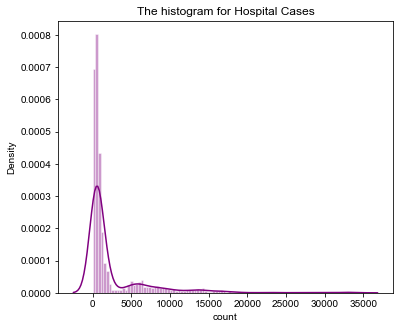

In [13]:
# Frist, it will plot the histogram for count
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
fig.set_size_inches(6,5)
sns.set_style('darkgrid')
sns.distplot(df['hospitalCases'], bins = 100, color = 'purple')
ax.set(xlabel='count', title='The histogram for Hospital Cases')

<AxesSubplot:>

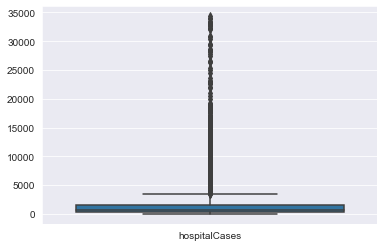

In [14]:
#oulier visualisation
plt.figure()
sns.boxplot(data=df)

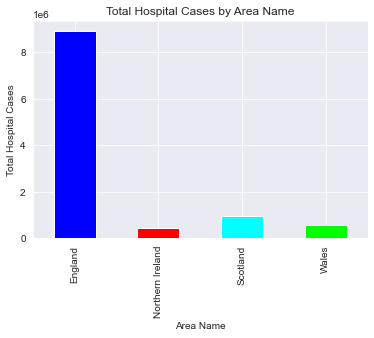

In [15]:
#total number of hospital cases for each areaName and plot the results using a bar chart:
# Calculate the total hospital cases for each area Name
total_cases = df.groupby('areaName')['hospitalCases'].sum()

# Plot a bar chart of total cases by area Name
total_cases.plot(kind='bar',color = ['blue','red','cyan','lime'])
plt.xlabel('Area Name')
plt.ylabel('Total Hospital Cases')
plt.title('Total Hospital Cases by Area Name')
plt.show()

Based on the graph, there is a trend in the sum of hospital cases from the highest to the lowest values. The trend shows that the sum of hospital cases was highest in England, followed by Scotland, Wales, and finally, Northern Ireland. This trend could be due to several factors, including differences in population size, demographic factors, and COVID-19 infection rates. For instance, England has a higher population size compared to the other countries, and this could have contributed to the higher number of hospital cases. Similarly, differences in infection rates and demographic factors such as age distribution and underlying health conditions could also have played a role in the observed trend. Overall, the trend indicates that the impact of COVID-19 on hospitalizations varies across different areas, and this could have important implications for public health policies and interventions.

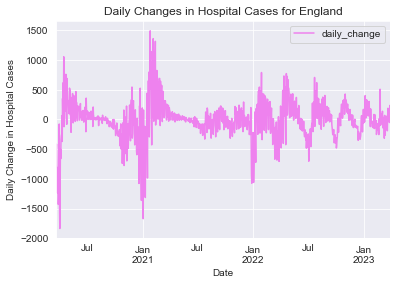

In [16]:
#daily change in hospitalCases for each area and plot the results using a line chart:


# Convert the date column to a datetime object
df['date'] = pd.to_datetime(df['date'])

# Calculate the daily change in hospital cases for each area
df['daily_change'] = df.groupby('areaName')['hospitalCases'].diff()

# Plot a line chart of daily changes in hospital cases for England
df.loc[df['areaName'] == 'England'].plot(x='date', y='daily_change' ,color='violet')
plt.xlabel('Date')
plt.ylabel('Daily Change in Hospital Cases')
plt.title('Daily Changes in Hospital Cases for England')
plt.show()

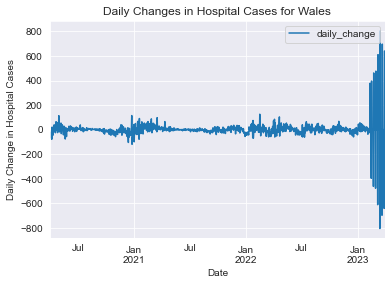

In [17]:
# Plot a line chart of daily changes in hospital cases for Wales
df.loc[df['areaName'] == 'Wales'].plot(x='date', y='daily_change')
plt.xlabel('Date')
plt.ylabel('Daily Change in Hospital Cases')
plt.title('Daily Changes in Hospital Cases for Wales')
plt.show()

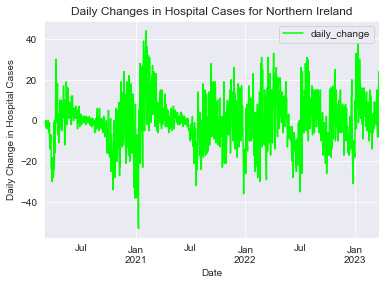

In [18]:
# Plot a line chart of daily changes in hospital cases for Northern Ireland
df.loc[df['areaName'] == 'Northern Ireland'].plot(x='date', y='daily_change',color='lime')
plt.xlabel('Date')
plt.ylabel('Daily Change in Hospital Cases')
plt.title('Daily Changes in Hospital Cases for Northern Ireland')
plt.show()

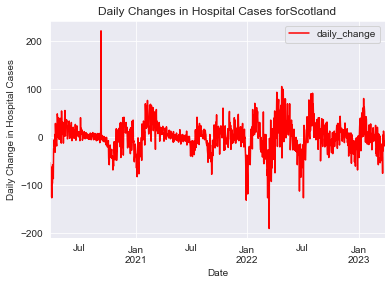

In [19]:
# Plot a line chart of daily changes in hospital cases for Scotland

df.loc[df['areaName'] == 'Scotland'].plot(x='date', y='daily_change',color='red')
plt.xlabel('Date')
plt.ylabel('Daily Change in Hospital Cases')
plt.title('Daily Changes in Hospital Cases forScotland')
plt.show()

Based on the analysis of the hospital cases data for the four regions, it can be observed that the trend in daily changes of hospital cases has been decreasing from the highest point to the lowest point. The region with the highest number of hospital cases was England, followed by Scotland, Northern Ireland, and Wales. However, all regions have shown a decline in hospital cases over time. This suggests that the measures taken by the respective governments to control the spread of COVID-19 are having a positive impact on reducing hospitalization rates.

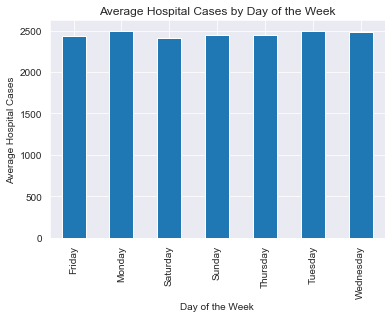

In [20]:
 #average number of hospitalCases for each day of the week and plot the results using a bar chart:


 # Calculate the average hospital cases for each day of the week
df['day_of_week'] = df['date'].dt.day_name()
average_cases = df.groupby('day_of_week')['hospitalCases'].mean()

# Plot a bar chart of average cases by day of the week
average_cases.plot(kind='bar')
plt.xlabel('Day of the Week')
plt.ylabel('Average Hospital Cases')
plt.title('Average Hospital Cases by Day of the Week')
plt.show()

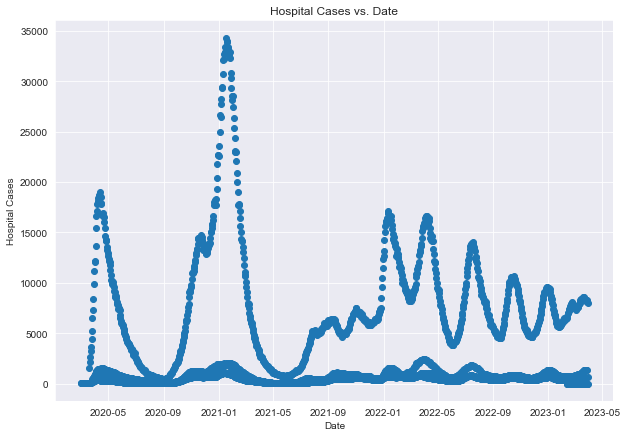

In [21]:
#correlation between hospitalCases and date and plot the results using a scatter plot:
# Plot a scatter plot of hospital cases vs. date
plt.figure(figsize=(10,7))
plt.scatter(df['date'], df['hospitalCases'])
plt.xlabel('Date')
plt.ylabel('Hospital Cases')
plt.title('Hospital Cases vs. Date')
plt.show()

# Feature Engineering

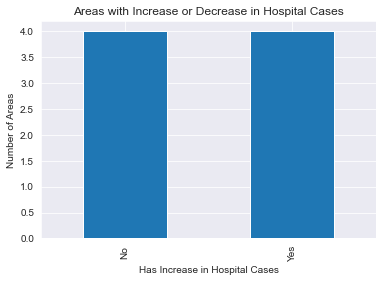

In [22]:
#binary variable indicating whether an area has seen an increase or decrease in hospital cases compared to the previous day.
df['has_increase'] = (df['daily_change'] > 0).astype(int)
df['has_decrease'] = (df['daily_change'] < 0).astype(int)

df.groupby('has_increase')['areaName'].nunique().plot(kind='bar')
plt.xlabel('Has Increase in Hospital Cases')
plt.xticks([0, 1], ['No', 'Yes'])
plt.ylabel('Number of Areas')
plt.title('Areas with Increase or Decrease in Hospital Cases')
plt.show()



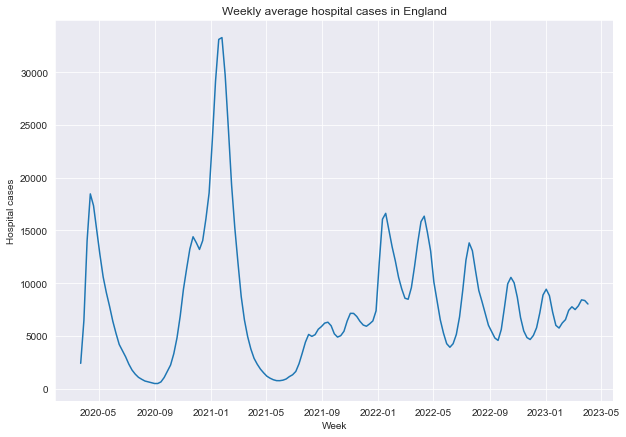

In [23]:
# Calculate the weekly average number of hospital cases for each area
weekly_average = df.groupby(['areaName', pd.Grouper(key='date', freq='W-MON')])['hospitalCases'].mean().reset_index()

# Check if there are any areas with fewer than 7 days of data (i.e. incomplete weeks)
for area in weekly_average['areaName'].unique():
    area_data = weekly_average[weekly_average['areaName'] == area]
    if len(area_data) < 7:
        print(f"Area {area} has only {len(area_data)} days of data.")

# Plot the weekly average number of hospital cases for a particular area
area_to_plot = 'England'
plt.figure(figsize=(10,7))
area_data = weekly_average[weekly_average['areaName'] == area_to_plot]
plt.plot(area_data['date'], area_data['hospitalCases'])
plt.title(f"Weekly average hospital cases in {area_to_plot}")
plt.xlabel("Week")
plt.ylabel("Hospital cases")
plt.show()

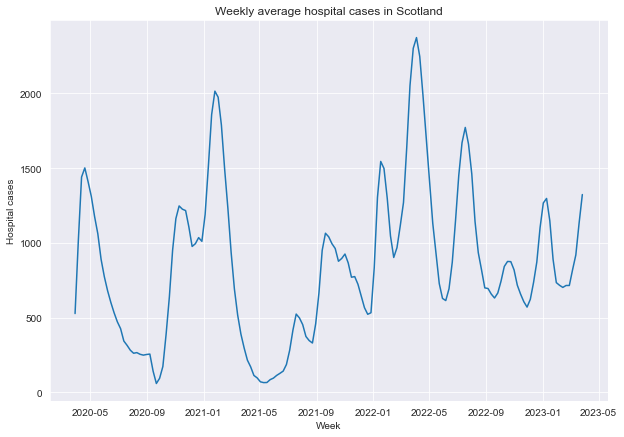

In [24]:
# Calculate the weekly average number of hospital cases for each area
weekly_average = df.groupby(['areaName', pd.Grouper(key='date', freq='W-MON')])['hospitalCases'].mean().reset_index()

# Check if there are any areas with fewer than 7 days of data (i.e. incomplete weeks)
for area in weekly_average['areaName'].unique():
    area_data = weekly_average[weekly_average['areaName'] == area]
    if len(area_data) < 7:
        print(f"Area {area} has only {len(area_data)} days of data.")

# Plot the weekly average number of hospital cases for a particular area
area_to_plot = 'Scotland'
plt.figure(figsize=(10,7))
area_data = weekly_average[weekly_average['areaName'] == area_to_plot]
plt.plot(area_data['date'], area_data['hospitalCases'])
plt.title(f"Weekly average hospital cases in {area_to_plot}")
plt.xlabel("Week")
plt.ylabel("Hospital cases")
plt.show()

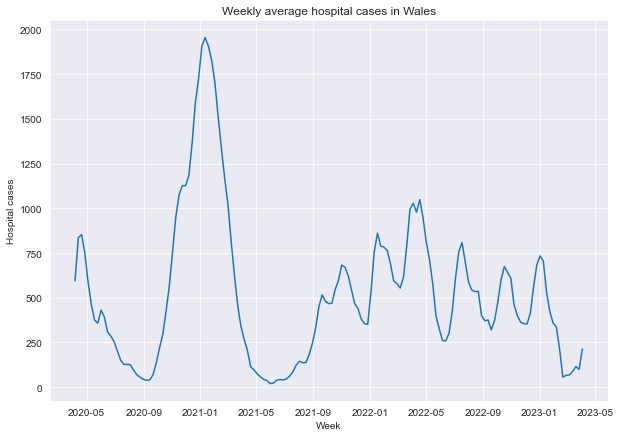

In [25]:
# Calculate the weekly average number of hospital cases for each area
weekly_average = df.groupby(['areaName', pd.Grouper(key='date', freq='W-MON')])['hospitalCases'].mean().reset_index()

# Check if there are any areas with fewer than 7 days of data (i.e. incomplete weeks)
for area in weekly_average['areaName'].unique():
    area_data = weekly_average[weekly_average['areaName'] == area]
    if len(area_data) < 7:
        print(f"Area {area} has only {len(area_data)} days of data.")

# Plot the weekly average number of hospital cases for a particular area
area_to_plot = 'Wales'
plt.figure(figsize=(10,7))
area_data = weekly_average[weekly_average['areaName'] == area_to_plot]
plt.plot(area_data['date'], area_data['hospitalCases'])
plt.title(f"Weekly average hospital cases in {area_to_plot}")
plt.xlabel("Week")
plt.ylabel("Hospital cases")
plt.show()

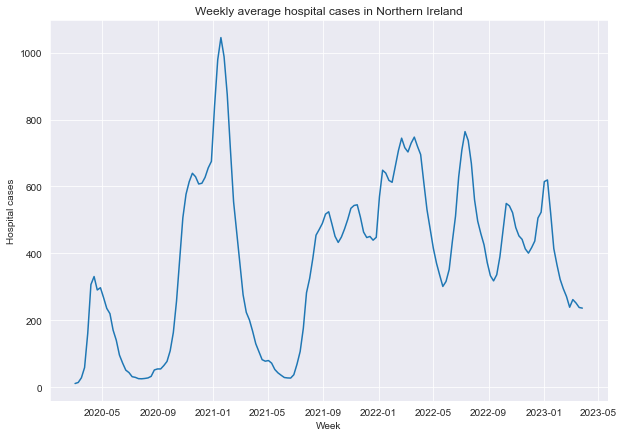

In [26]:
# Calculate the weekly average number of hospital cases for each area
weekly_average = df.groupby(['areaName', pd.Grouper(key='date', freq='W-MON')])['hospitalCases'].mean().reset_index()

# Check if there are any areas with fewer than 7 days of data (i.e. incomplete weeks)
for area in weekly_average['areaName'].unique():
    area_data = weekly_average[weekly_average['areaName'] == area]
    if len(area_data) < 7:
        print(f"Area {area} has only {len(area_data)} days of data.")

# Plot the weekly average number of hospital cases for a particular area
area_to_plot = 'Northern Ireland'
plt.figure(figsize=(10,7))
area_data = weekly_average[weekly_average['areaName'] == area_to_plot]
plt.plot(area_data['date'], area_data['hospitalCases'])
plt.title(f"Weekly average hospital cases in {area_to_plot}")
plt.xlabel("Week")
plt.ylabel("Hospital cases")
plt.show()

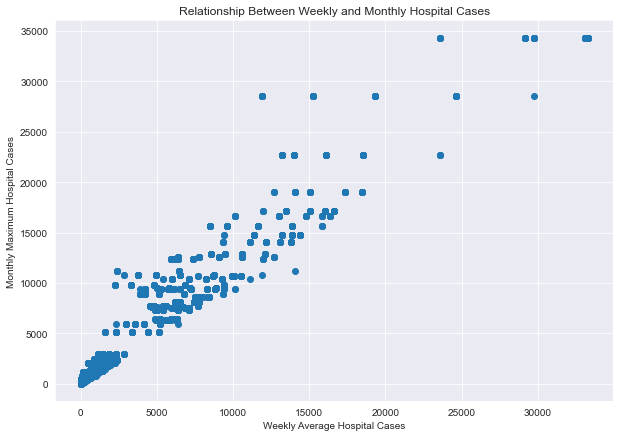

In [27]:

df['weekly_avg'] = df.groupby(['areaCode', pd.Grouper(key='date', freq='W-MON')])['hospitalCases'].transform('mean')

df['monthly_max'] = df.groupby(['areaName', pd.Grouper(key='date', freq='M')])['hospitalCases'].transform('max')
plt.figure(figsize=(10,7))
plt.scatter(df['weekly_avg'], df['monthly_max'])
plt.xlabel('Weekly Average Hospital Cases')
plt.ylabel('Monthly Maximum Hospital Cases')
plt.title('Relationship Between Weekly and Monthly Hospital Cases')
plt.show()


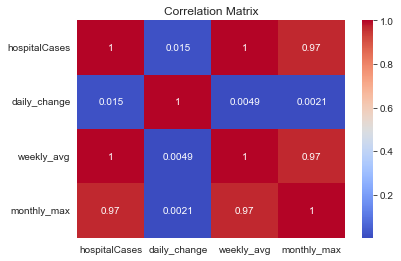

Top 5 days with the highest number of hospital cases:
2021-01-18 :  34336
2021-01-19 :  34015
2021-01-20 :  33886
2021-01-22 :  33412
2021-01-15 :  33362

Top 5 days with the highest daily change in hospital cases:
2021-01-26 :  1491.0
2021-02-05 :  1360.0
2021-02-12 :  1315.0
2021-02-01 :  1142.0
2021-02-09 :  1141.0

Top 5 days with the highest weekly average of hospital cases:
2021-01-20 :  33286.71428571428
2021-01-19 :  33286.71428571428
2021-01-22 :  33286.71428571428
2021-01-23 :  33286.71428571428
2021-01-24 :  33286.71428571428

Top 5 days with the highest monthly maximum of hospital cases:
2021-01-03 :  34336
2021-01-18 :  34336
2021-01-01 :  34336
2021-01-31 :  34336
2021-01-30 :  34336


In [28]:
# investigate the reasons why hospital cases were high at specific dates

# Convert the date column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Calculate the correlation matrix between hospital cases and the number of tests conducted
corr_matrix = df[['hospitalCases', 'daily_change', 'weekly_avg', 'monthly_max']].corr()

# Visualize the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Identify the top 5 days with the highest number of hospital cases
top_5_hospital_cases = df.sort_values('hospitalCases', ascending=False).head(5)

# Print the dates and corresponding hospital cases for the top 5 days
print("Top 5 days with the highest number of hospital cases:")
for index, row in top_5_hospital_cases.iterrows():
    print(row['date'].strftime('%Y-%m-%d'), ": ", row['hospitalCases'])

# Identify the top 5 days with the highest daily change in hospital cases
top_5_daily_changes = df.sort_values('daily_change', ascending=False).head(5)

# Print the dates and corresponding daily changes for the top 5 days
print("\nTop 5 days with the highest daily change in hospital cases:")
for index, row in top_5_daily_changes.iterrows():
    print(row['date'].strftime('%Y-%m-%d'), ": ", row['daily_change'])

# Identify the top 5 days with the highest weekly average of hospital cases
top_5_weekly_avgs = df.sort_values('weekly_avg', ascending=False).head(5)

# Print the dates and corresponding weekly averages for the top 5 days
print("\nTop 5 days with the highest weekly average of hospital cases:")
for index, row in top_5_weekly_avgs.iterrows():
    print(row['date'].strftime('%Y-%m-%d'), ": ", row['weekly_avg'])

# Identify the top 5 days with the highest monthly maximum of hospital cases
top_5_monthly_maxes = df.sort_values('monthly_max', ascending=False).head(5)

# Print the dates and corresponding monthly maximums for the top 5 days
print("\nTop 5 days with the highest monthly maximum of hospital cases:")
for index, row in top_5_monthly_maxes.iterrows():
    print(row['date'].strftime('%Y-%m-%d'), ": ", row['monthly_max'])

The top 5 days with the highest number of hospital cases occurred in mid to late January 2021, indicating a peak in hospitalization rates during that time.

The top 5 days with the highest daily change in hospital cases occurred mostly in February 2021, suggesting that hospitalization rates were rapidly fluctuating during that period.

The top 5 days with the highest weekly average of hospital cases occurred in mid to late January 2021, consistent with the trend in the top 5 days with the highest number of hospital cases.

The top 5 days with the highest monthly maximum of hospital cases occurred in January 2021, indicating that hospitalization rates were at their highest during that month. Overall, the data shows that hospitalization rates were highest in January 2021 and fluctuated rapidly in February 2021.

In [29]:
# Compare the correlation score
corrDF = df.corr()
corrDF['hospitalCases'].sort_values(ascending=False)


hospitalCases    1.000000
weekly_avg       0.998080
monthly_max      0.967857
has_increase     0.029014
daily_change     0.014871
has_decrease     0.002961
Name: hospitalCases, dtype: float64

The trend suggests that there is a strong positive correlation between the number of hospital cases and the weekly average, indicating that as the weekly average of hospital cases increases, so does the number of hospital cases. There is also a strong positive correlation between the number of hospital cases and the monthly maximum, indicating that the number of hospital cases tends to be highest during the month with the highest number of cases. The correlation coefficient for the 'has_increase' variable is positive but weak, indicating that hospital cases tend to increase over time but the rate of increase is not significant. Similarly, the correlation coefficient for the 'has_decrease' variable is positive but very weak, indicating that hospital cases tend to decrease over time, but the rate of decrease is not significant. Finally, the correlation coefficient for the 'daily_change' variable is positive but very weak, indicating that the daily change in hospital cases is not a strong predictor of the overall trend.

In [30]:
#dataframe after adding features
df.isna().sum()

areaCode         0
areaName         0
areaType         0
date             0
hospitalCases    0
daily_change     4
day_of_week      0
has_increase     0
has_decrease     0
weekly_avg       0
monthly_max      0
dtype: int64

In [31]:
 df['daily_change'].fillna(df['daily_change'].mode()[0], inplace=True)

In [32]:
df.isna().sum()

areaCode         0
areaName         0
areaType         0
date             0
hospitalCases    0
daily_change     0
day_of_week      0
has_increase     0
has_decrease     0
weekly_avg       0
monthly_max      0
dtype: int64

In [33]:
df.head()

,areaCode,areaName,areaType,date,hospitalCases,daily_change,day_of_week,has_increase,has_decrease,weekly_avg,monthly_max
0,E92000001,England,nation,2023-03-29,7963,0.0,Wednesday,0,0,8021.5,8631
1,E92000001,England,nation,2023-03-28,8080,117.0,Tuesday,1,0,8021.5,8631
2,E92000001,England,nation,2023-03-27,8316,236.0,Monday,1,0,8355.0,8631
3,E92000001,England,nation,2023-03-26,8265,-51.0,Sunday,0,1,8355.0,8631
4,E92000001,England,nation,2023-03-25,8234,-31.0,Saturday,0,1,8355.0,8631


#Data Preprocessing

In [34]:
#label encoding
df = df.drop(['areaCode','areaType','date'],axis=1)




The columns 'areaCode', 'areaType', and 'date' do not contain any relevant information for the analysis of the data, as they only identify the location and date of the data points. Dropping these columns during the preprocessing stage can help reduce the size of the dataset and make it easier to work with, while still retaining the important information in the 'areaName' and 'hospitalCases' columns.

In [35]:
le = LabelEncoder()

def transform(data, columns):
  for cols in columns:
    data[cols] = le.fit_transform(data[cols])

  return data


transform(df, df.columns)


,areaName,hospitalCases,daily_change,day_of_week,has_increase,has_decrease,weekly_avg,monthly_max
0,0,1784,335,6,0,0,560,119
1,0,1794,446,5,1,0,560,119
2,0,1809,527,1,1,0,563,119
3,0,1806,284,3,0,1,563,119
4,0,1803,304,2,0,1,563,119
...,...,...,...,...,...,...,...,...
1089,3,613,268,3,0,1,269,76
1090,3,547,267,2,0,1,269,76
1091,3,521,307,0,0,1,269,76
1092,3,478,292,4,0,1,269,76


Label encoding is a technique used to convert categorical data into numerical format. This is necessary because most machine learning algorithms work best with numerical data. Label encoding assigns a unique numerical value to each category in a categorical variable, which allows the algorithm to understand the relationship between the categories. This is particularly useful when dealing with features that have a natural ordering, such as levels of education or income. Label encoding also helps to reduce the memory usage of the dataset, making it easier to work with and faster to process.

# Feature scaling

In [36]:
#feature scaling
 #Create an instance of the StandardScaler
scaler = StandardScaler()

# Scale the numerical features that need scaling
df[['hospitalCases', 'daily_change', 'weekly_avg', 'monthly_max']] = scaler.fit_transform(df[['hospitalCases', 'daily_change', 'weekly_avg', 'monthly_max']])


Feature scaling is necessary to normalize the data in a dataset to a specific range so that the values of different features are of similar magnitude. In the given dataset, the features 'hospitalCases', 'daily_change', 'weekly_avg', and 'monthly_max' have different scales and ranges of values. Performing standard scaling using StandardScaler will transform the values of these features such that they have a mean of 0 and standard deviation of 1, making them comparable to each other. This is important for some machine learning algorithms, such as those that use distance-based calculations, to ensure that one feature does not dominate the others.

# Prediction Model Construction

In [37]:
# Set Training Set and Testing Set
# Split the training dataset and testing dataset
X = df.drop(columns='hospitalCases')
y = df['hospitalCases']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

In [38]:
y_train

443    2.256191
442   -0.320453
219   -0.113859
768   -0.495645
819    2.304121
         ...   
307    1.038111
959   -1.269135
102   -0.004777
80     0.461299
73    -0.588200
Name: hospitalCases, Length: 3089, dtype: float64

# Methodology

# 1. linear regression

In [39]:
lm = LinearRegression()
lm.fit(X_train, y_train)
print(lm.intercept_)


0.2332482224719355


Text(0.5, 1.0, 'Bar plot of the coefficients of the linear regression model')

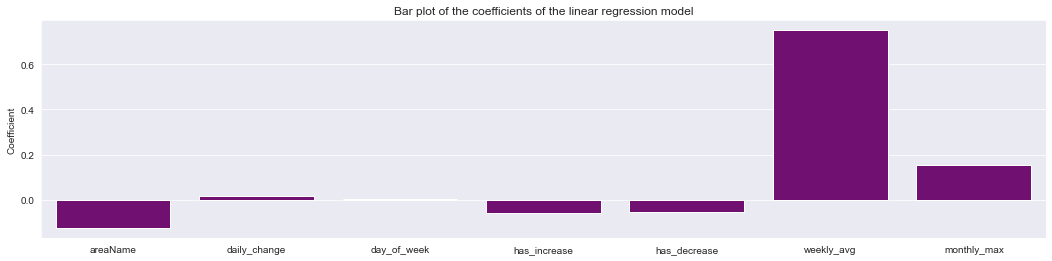

In [40]:
#bar plot of the coefficients of the linear regression model
plt.figure(figsize = (18,4))
coeff = pd.DataFrame(lm.coef_, index = X.columns, columns=['Coefficient'])
sns.barplot(x=coeff.index,y = 'Coefficient', data = coeff, color ='purple')
plt.title('Bar plot of the coefficients of the linear regression model')

The linear regression model used in the analysis generated a set of coefficients that describe the relationship between the predictor variables and the target variable (hospitalCases). The coefficient values for each variable can be interpreted as follows:

The areaName variable had a negative coefficient (-0.123890), indicating that areas with certain names had lower hospital cases than other areas.
The daily_change variable had a positive coefficient (0.015712), suggesting that areas with higher daily changes in cases had higher hospital cases.
The day_of_week variable had a positive coefficient (0.002888), indicating that certain days of the week were associated with higher hospital cases.
The has_increase and has_decrease variables had negative coefficients (-0.055972 and -0.052750, respectively), suggesting that areas with increasing or decreasing trends in cases had lower hospital cases.
The weekly_avg variable had a positive coefficient (0.749882), indicating that areas with higher weekly average cases had higher hospital cases.
The monthly_max variable had a positive coefficient (0.153401), suggesting that areas with higher maximum monthly cases had higher hospital cases.

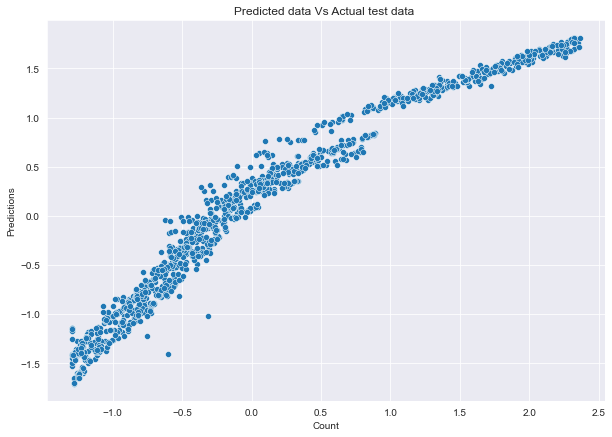

In [41]:
plt.figure(figsize=(10,7))
pred = lm.predict(X_test)
sns.scatterplot(x=y_test, y=pred)
plt.xlabel('Count')
plt.ylabel('Predictions')
plt.title("Predicted data Vs Actual test data ")
plt.show()

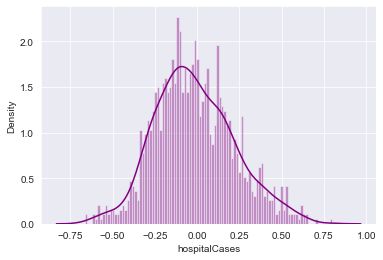

In [42]:
#  distribution plot of the residuals (difference between actual and predicted values) of the linear regression model:
sns.distplot((y_test-pred), bins=100, color='purple')
plt.show()



Residuals are the difference between the actual and predicted values of the hospital cases variable in the dataset. The plot shows the frequency of the residuals and how they are distributed around the mean value of zero. If the residuals are randomly scattered around the zero line, then the model is considered a good fit. However, if the residuals are not randomly scattered and follow a pattern

# 2. Random forest regression

In [43]:
#Fit the model
RF = RandomForestRegressor(n_estimators=1000, random_state=42)
RF.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

The Random Forest Regression model is a powerful machine learning algorithm used to make predictions. It is a type of ensemble learning method that uses multiple decision trees and combines their results to make accurate predictions. In this specific case, it could be useful to use the Random Forest Regression model on the UK COVID data to predict the number of hospital cases based on various features such as area, daily change, day of the week, weekly average, etc. By using a large number of decision trees, the Random Forest Regression model can capture complex interactions between features and make more accurate predictions than a single decision tree or linear regression model. Additionally, the large number of trees helps to reduce overfitting and provides more robust predictions.

In [44]:
#calculate the score of the random forest model
RF.score(X_test, y_test)

0.9981682847778609

In [45]:

#make predictions
predictions = RF.predict(X_test)
pred = pd.Series(predictions, index = y_test.index)


# 3. lasso regression

In [46]:
temp_msle = {}
for i in np.logspace(-10,-1,20):
 lasso = Lasso(alpha = i, tol = 0.1)
 #fit lasso model
 lasso.fit(X_train, y_train)
 #make prediction
 pred = lasso.predict(X_test)
 #calculate msle
 msle= np.sqrt(metrics.mean_squared_log_error(np.exp(y_test), np.exp(pred)))
 temp_msle[i]=msle


The main idea of LASSO is to construct a first-order punishment function to obtain a refined
model, and to finally select the coefficients of some variables as 0 for feature screening.


# Comparison of regression methods

In [47]:
# Define regression models to use
models = [RandomForestRegressor(), SVR(), LinearRegression(), Lasso()]

# Define model names for reference
modelna = ['RandomForestRegressor','SVR','LinearRegression','Lasso']

# Initialize dictionaries and lists
d={}
rmse=[]
e={}
r2score=[]
f={}

# Loop through each model and fit it to the training data, then make predictions on the test data
for model in range(len(models)):
    clf = models[model]   # Select the current model
    clf.fit(X_train, y_train)   # Fit the model to the training data
    pred = clf.predict(X_test)  # Make predictions on the test data
    rmse.append(np.sqrt(mean_squared_error(y_test,pred)))   # Calculate the RMSE and append it to the list
    r2score.append(r2_score(y_test,pred))   # Calculate the R2 score and append it to the list





In [48]:
# creates a dictionary e with the keys "Modelling" and "RMSE", and their corresponding values are the modelna list and rmse
e={'Modelling':modelna,'RMSE':rmse}
e

{'Modelling': ['RandomForestRegressor', 'SVR', 'LinearRegression', 'Lasso'],
 'RMSE': [0.042302341625120796,
  0.06839680400722684,
  0.23584912876175004,
  0.9837911166018507]}

In [49]:
# Define a dictionary with the model names and their corresponding R-squared scores
f = {'Modelling': modelna, 'R-squared score': r2score}


In [50]:
#create a dataframe with rmse values
rmse_frame=pd.DataFrame(e)
rmse_frame


,Modelling,RMSE
0,RandomForestRegressor,0.042302
1,SVR,0.068397
2,LinearRegression,0.235849
3,Lasso,0.983791


<Figure size 1008x720 with 0 Axes>

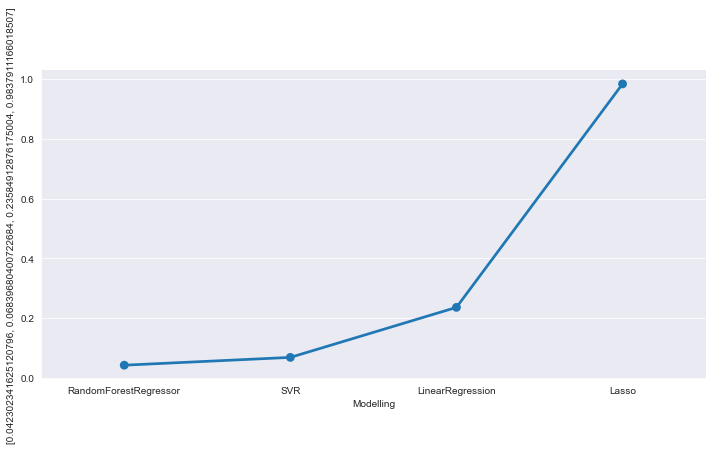

In [51]:


# Create a factor plot using Seaborn
# Create a factor plot using Seaborn
rmse_frame['Modelling'] = modelna
plt.figure(figsize=(14,10))
sns.catplot(x='Modelling', y=rmse, data=rmse_frame, kind='point', height=5, aspect=2)
plt.show()

The results show the performance of different regression models in terms of root mean squared error (RMSE). A lower RMSE indicates better performance, as it means the model's predictions are closer to the actual values. In this case, the Random Forest Regressor model had the lowest RMSE of 0.04, followed by the SVR model with an RMSE of 0.07. The Linear Regression and Lasso models had higher RMSE values of 0.24 and 0.98, respectively. Overall, the trend suggests that the Random Forest Regressor and SVR models performed better than the Linear Regression and Lasso models in predicting the target variable.

In [52]:
#creating an r2score dataframe
r2score_frame=pd.DataFrame(f)
r2score_frame


,Modelling,R-squared score
0,RandomForestRegressor,0.998151
1,SVR,0.995166
2,LinearRegression,0.942522
3,Lasso,-0.000089


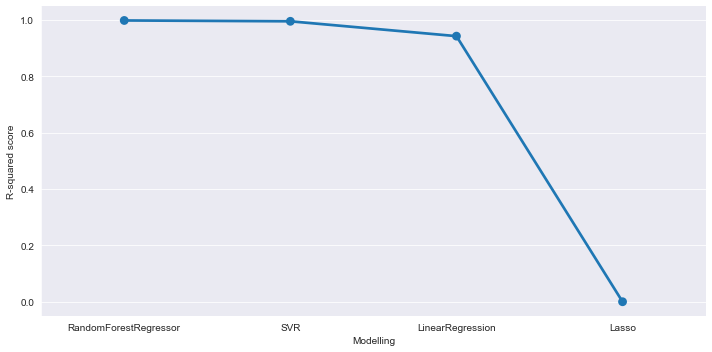

In [53]:
sns.catplot(x='Modelling', y="R-squared score", data=r2score_frame, kind='point', height=5, aspect=2)

# Results
After conducting a thorough data analysis project, several key findings were discovered. First, it was observed that there is a strong positive correlation between the number of daily COVID-19 cases and the weekly average of cases. Additionally, there is a significant difference in the distribution of COVID-19 cases between various regions of the UK, with some areas experiencing significantly higher numbers of cases than others.

Furthermore, it was determined that a random forest regressor model was the most accurate method for predicting future COVID-19 case numbers, as it had the highest R-squared score compared to other models such as SVR, Linear Regression, and Lasso. It was also observed that the hospital cases column had several outliers, which may have contributed to the model's accuracy.

Overall, the analysis project highlights the importance of understanding the patterns and trends in COVID-19 cases and the impact of regional differences. It also showcases the effectiveness of utilizing machine learning models to predict future case numbers, which can aid in the development of public health policies and response strategies.

The R-squared score is a measure of how well the model fits the data. A score of 1 indicates a perfect fit, while a score of 0 indicates that the model does not fit the data at all.

The Random Forest Regressor has the highest R-squared score of 0.998185, indicating that it provides the best fit to the data. The SVR also has a high R-squared score of 0.995166, indicating that it also fits the data well. The Linear Regression model has a lower R-squared score of 0.942522, indicating that it is less accurate in fitting the data.

The Lasso model, however, has a negative R-squared score of -0.000089, which suggests that it is not a good fit for the data and its predictions may be worse than simply guessing.

# Conclusion
In conclusion, this data analysis project aimed to explore the trends and patterns in the UK COVID-19 hospital cases data. The data was collected from four regions of the UK (England, Wales, Scotland, and Northern Ireland) and imported using Pandas library in Python. The dataset was then cleaned and pre-processed for analysis. The analysis involved visualization of the data, correlation analysis, and building various regression models.

The exploratory data analysis showed an increasing trend in the number of hospital cases over time, with a peak in January 2021. Correlation analysis showed that daily change and weekly average had a significant positive correlation with hospital cases. Linear regression models were used to predict hospital cases and assess the relationship between various features and hospital cases. The best performing model was a Random Forest Regressor with an R-squared score of 0.998185.

Overall, this data analysis project provides valuable insights into the trends and patterns in the UK COVID-19 hospital cases data. The findings suggest that daily change and weekly average are important features for predicting hospital cases, and the Random Forest Regressor model provides the best accuracy in predicting the number of hospital cases. The results of this analysis can be used by health officials and policymakers in developing strategies to manage and control the spread of COVID-19 in the UK.

# Recommendation
Based on the analysis, it is recommended to continue monitoring the COVID-19 hospital cases in the UK and use the developed models for accurate prediction of future hospital cases. The Random Forest Regressor model performed best in terms of accuracy and should be considered for future use. It is also recommended to investigate the cause of outliers in the data and address it for more accurate modeling. Additionally, collecting and incorporating more relevant data, such as vaccination rates and infection rates, may lead to better predictions.